In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Data**

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **Feature engineering**

to counter the object data

In [6]:
Male = pd.get_dummies(df['sex'])

In [7]:
Male.head()   # as it is 0 or 1 so droping one doesnot effect , why increase variable

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [8]:
Male = pd.get_dummies(df['sex'],drop_first=True)

In [9]:
Male.head()

,male
0,0
1,1
2,1
3,1
4,1


In [10]:
df = pd.concat([df,Male],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [11]:
Smoker = pd.get_dummies(df['smoker'],drop_first=True)
df=pd.concat([df,Smoker],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [12]:
df = df.rename(columns = {'yes': 'Smoker'})
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [13]:
Region = pd.get_dummies(df['region'],drop_first=True)
df=pd.concat([df,Region],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [14]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# **Exploratory analysis**

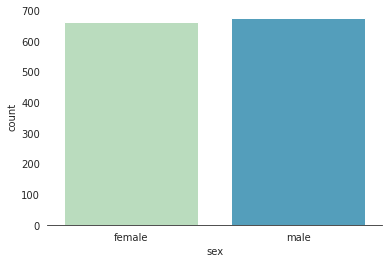

In [15]:
sns.set_style('white')
sns.countplot(x ="sex",data=df, palette="GnBu")
sns.despine(left=True)

In [16]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

## **Relationship of Smoking and gender to Charges**

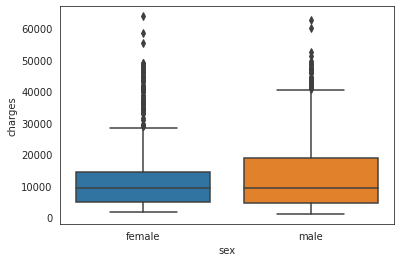

In [17]:
sns.boxplot(x="sex", y = "charges", data=df)

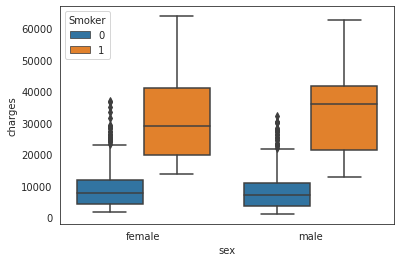

In [18]:
sns.boxplot(x="sex", y = "charges", data=df, hue = "Smoker")

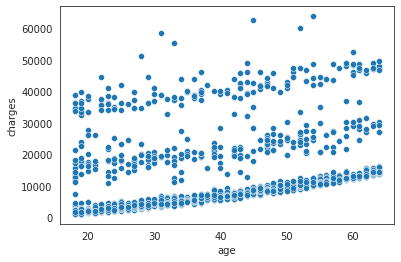

In [19]:
sns.scatterplot(x="age", y="charges",data=df)   # why there is jump irregularities

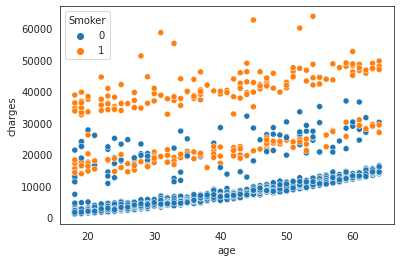

In [20]:
sns.scatterplot(x="age", y="charges",data=df,hue="Smoker")  # less is age and u smoke u chrges will increase

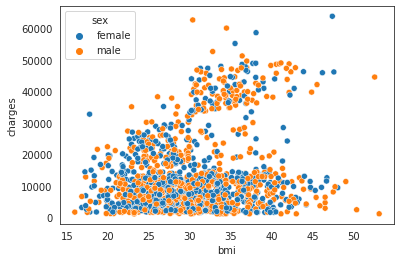

In [21]:
sns.scatterplot(x="bmi",y="charges", data=df, hue="sex")

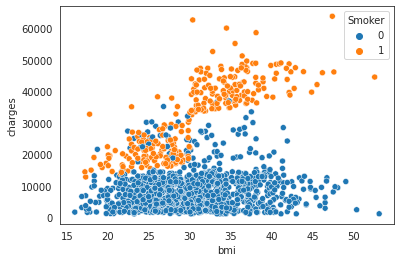

In [22]:
sns.scatterplot(x="bmi",y="charges", data=df, hue="Smoker")

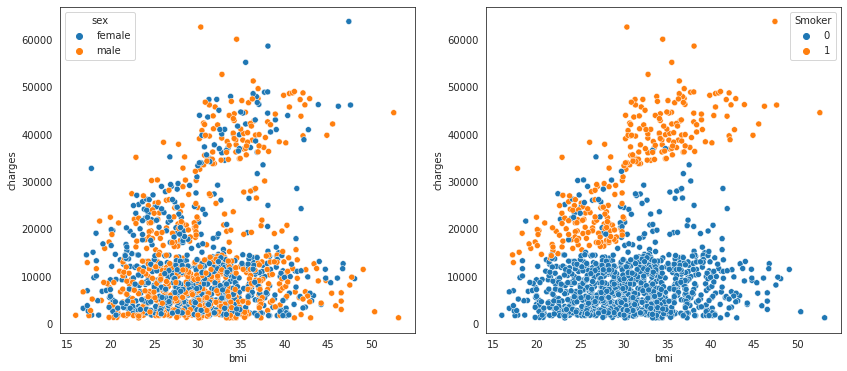

In [23]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(14,6))
sns.scatterplot(x="bmi",y="charges", data=df, hue="sex",ax=ax[0])
sns.scatterplot(x="bmi",y="charges", data=df, hue="Smoker",ax=ax[1])

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [25]:
df.drop(["sex","smoker","region"],axis=1,inplace=True)

In [26]:
df.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


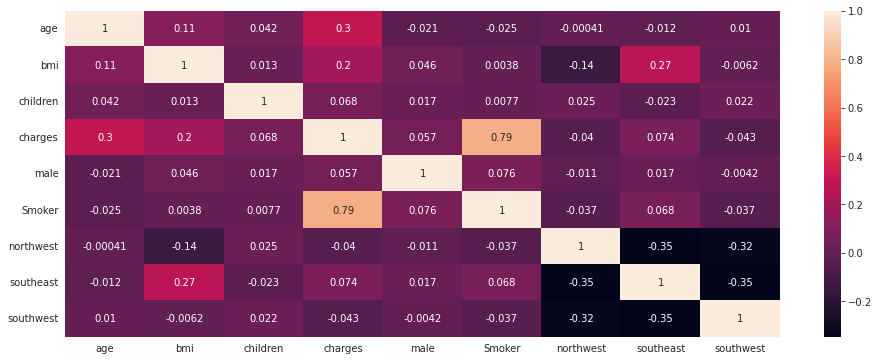

In [27]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True)

In [28]:
df.corr()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
Smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


# **Splitting the data**

In [29]:
x = df.drop('charges',axis=1)
y=df['charges']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)

In [31]:
x_train.shape

(802, 8)

In [32]:
df.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


# scalling the data

In [33]:
from sklearn.preprocessing import StandardScaler   # why scaling to remove bais
scaler = StandardScaler()

In [34]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)


# **Support Vector Regression Model**

In [35]:
from sklearn.svm import SVR

regressor = SVR()
regressor.fit(scaled_x_train,y_train)

SVR()

In [36]:
predict = regressor.predict(scaled_x_test)

In [37]:
predict.shape

(536,)

In [38]:
y_test.shape

(536,)

In [39]:
predict[:10]

array([9096.72244866, 9177.49552267, 9127.81211562, 9083.90127059,
       9097.94701683, 9159.99165511, 9113.17007709, 9159.06883609,
       9112.46923189, 9140.22773191])

In [40]:
y_test[:10]

626      6748.59120
668     45710.20785
401      8083.91980
428      3167.45585
1238     6985.50695
917     35069.37452
790      5662.22500
1070    39871.70430
243      7196.86700
715     12146.97100
Name: charges, dtype: float64